In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/extractedfeatures/ExtractedFeatures/14_20140601.mat
/kaggle/input/extractedfeatures/ExtractedFeatures/3_20140611.mat
/kaggle/input/extractedfeatures/ExtractedFeatures/10_20131204.mat
/kaggle/input/extractedfeatures/ExtractedFeatures/1_20131030.mat
/kaggle/input/extractedfeatures/ExtractedFeatures/6_20131113.mat
/kaggle/input/extractedfeatures/ExtractedFeatures/5_20140506.mat
/kaggle/input/extractedfeatures/ExtractedFeatures/11_20140625.mat
/kaggle/input/extractedfeatures/ExtractedFeatures/12_20131127.mat
/kaggle/input/extractedfeatures/ExtractedFeatures/4_20140621.mat
/kaggle/input/extractedfeatures/ExtractedFeatures/9_20140627.mat
/kaggle/input/extractedfeatures/ExtractedFeatures/14_20140615.mat
/kaggle/input/extractedfeatures/ExtractedFeatures/11_20140618.mat
/kaggle/input/extractedfeatures/ExtractedFeatures/15_20130709.mat
/kaggle/input/extractedfeatures/ExtractedFeatures/6_20130712.mat
/kaggle/input/extractedfeatures/ExtractedFeatures/13_20140527.mat
/kaggle/input/ext

In [2]:
import math # provides mathematical functions
import scipy.io # provides tools for reading MATLAB files
import numpy as np # provides support for large, multi-dimensional arrays and matrices
from scipy.stats import pearsonr # provides the Pearson correlation coefficient and associated p-value
from matplotlib import pyplot as plt # provides plotting functions
import networkx as nx # provides tools for working with graphs and networks
import time  # provides time-related functions
from tqdm import tqdm  # provides progress bars for loops and functions
import seaborn as sns  # provides statistical data visualization tools


In [3]:
# Define a function to load subject data
def load_subject_data():
    all_subjects_data = []
    # List of file names to be loaded
    file_names = ['1_20131027.mat', '2_20140404.mat', '3_20140603.mat', '4_20140621.mat', '5_20140411.mat', '6_20130712.mat', '7_20131027.mat', '8_20140511.mat', '9_20140620.mat', '10_20131130.mat', '11_20140618.mat', '12_20131127.mat', '13_20140527.mat', '14_20140601.mat', '15_20130709.mat']
    
    # Loop through each file name and load the data
    for file_name in file_names:
        subject_data = scipy.io.loadmat("/kaggle/input/extractedfeatures/ExtractedFeatures/" + file_name)
        all_subjects_data.append(subject_data)
    
    # Return the loaded data
    return all_subjects_data

# Define a function to load labels
def load_labels():
    # Load the label data
    label = scipy.io.loadmat("/kaggle/input/extractedfeatures/ExtractedFeatures/" + 'label.mat')
    labels = label['label'][0]
    # Return the loaded labels
    return labels




In [4]:
"""To understand how the dataset is structured, see the following"""

# Loading the subject EEG Data
subjects_data = load_subject_data()

# Print the all types of Feature Extracted Data of the first subject
print(subjects_data[0].keys())

# Print the emotional state that corresponds to each film clip
print(load_labels())

dict_keys(['__header__', '__version__', '__globals__', 'de_movingAve1', 'de_LDS1', 'psd_movingAve1', 'psd_LDS1', 'dasm_movingAve1', 'dasm_LDS1', 'rasm_movingAve1', 'rasm_LDS1', 'asm_movingAve1', 'asm_LDS1', 'dcau_movingAve1', 'dcau_LDS1', 'de_movingAve2', 'de_LDS2', 'psd_movingAve2', 'psd_LDS2', 'dasm_movingAve2', 'dasm_LDS2', 'rasm_movingAve2', 'rasm_LDS2', 'asm_movingAve2', 'asm_LDS2', 'dcau_movingAve2', 'dcau_LDS2', 'de_movingAve3', 'de_LDS3', 'psd_movingAve3', 'psd_LDS3', 'dasm_movingAve3', 'dasm_LDS3', 'rasm_movingAve3', 'rasm_LDS3', 'asm_movingAve3', 'asm_LDS3', 'dcau_movingAve3', 'dcau_LDS3', 'de_movingAve4', 'de_LDS4', 'psd_movingAve4', 'psd_LDS4', 'dasm_movingAve4', 'dasm_LDS4', 'rasm_movingAve4', 'rasm_LDS4', 'asm_movingAve4', 'asm_LDS4', 'dcau_movingAve4', 'dcau_LDS4', 'de_movingAve5', 'de_LDS5', 'psd_movingAve5', 'psd_LDS5', 'dasm_movingAve5', 'dasm_LDS5', 'rasm_movingAve5', 'rasm_LDS5', 'asm_movingAve5', 'asm_LDS5', 'dcau_movingAve5', 'dcau_LDS5', 'de_movingAve6', 'de_LDS6

   # **Data Preprocessing**
   *This code defines a function to preprocess data containing features extracted from film clips for multiple subjects using StandardScaler.*

In [5]:
# Import the necessary library
from sklearn.preprocessing import StandardScaler

# Define the preprocessing function
def preprocess_data(all_subject_data):
    # Initialize an empty list to store preprocessed data
    preprocessed_data = []

    # Iterate through each subject's data
    for subject_data in all_subject_data:
        
        # Initialize an empty list to store features
        features = []
        
        # Iterate through each film clip (1 to 15)
        for i in range(1, 16):
            
            # Concatenate differential entropy features (moving average and LDS)
            de = np.concatenate([subject_data[f'de_movingAve{i}'], subject_data[f'de_LDS{i}']], axis=2)
            
            # Concatenate power spectral density features (moving average and LDS)
            psd = np.concatenate([subject_data[f'psd_movingAve{i}'], subject_data[f'psd_LDS{i}']], axis=2)
            
            # Pad the asm_movingAve and asm_LDS arrays to match dimensions
            asm_movingAve_padded = np.pad(subject_data[f'asm_movingAve{i}'], ((0, 8), (0, 0), (0, 0)), mode='constant', constant_values=0)
            asm_LDS_padded = np.pad(subject_data[f'asm_LDS{i}'], ((0, 8), (0, 0), (0, 0)), mode='constant', constant_values=0)
            
            # Concatenate asm features (moving average and LDS)
            asm = np.concatenate([asm_movingAve_padded, asm_LDS_padded], axis=2)
            
            # Concatenate all features and reshape the array
            all_features = np.concatenate([de, psd, asm], axis=2).reshape(62, -1)
            
            # Append the features to the features list
            features.append(all_features)

        # Initialize a StandardScaler object
        scaler = StandardScaler()
        
        # Fit and transform the features using the scaler
        subject_features = scaler.fit_transform(np.hstack(features))
        
        # Append the preprocessed features to the preprocessed_data list
        preprocessed_data.append(subject_features)

    # Return the preprocessed data
    return preprocessed_data


### *CALCULATE SIMILARITIES BETWEEN SUBJECTS*
*This function calculates the similarity between the preprocessed data for all pairs of subjects for each of the 15 films. The similarities are stored in a 3D matrix of dimensions num_subjects x num_subjects x 15, where each element represents the similarity between two subjects for a particular film. The function iterates over all pairs of subjects (including self-similarity) and all 15 films, calculates the Pearson correlation coefficient between the preprocessed data for the current film, and stores the similarity in the similarity matrix. Since the similarity matrix is symmetric, the function stores the similarity for both [i, j, k] and [j, i, k] entries. Finally, the function returns the similarity matrix.*

In [6]:
def calculate_similarity(preprocessed_data):
    # Get the number of subjects
    num_subjects = len(preprocessed_data)
    
    # Create a 3D similarity matrix filled with zeros
    # Dimensions: num_subjects x num_subjects x 15 (for each of the 15 films)
    similarity_matrix = np.zeros((num_subjects, num_subjects, 15))
    
    # Iterate over all pairs of subjects (including self-similarity)
    for i in range(num_subjects):
        for j in range(i, num_subjects):
            # Iterate over all 15 films
            for k in range(15):
                # Calculate the Pearson correlation coefficient between the preprocessed data for the current film
                similarity = np.corrcoef(preprocessed_data[i][k].flatten(), preprocessed_data[j][k].flatten())[0,1]
                
                # Store the similarity in the similarity matrix (both [i, j, k] and [j, i, k] entries, since the matrix is symmetric)
                similarity_matrix[i, j, k] = similarity
                similarity_matrix[j, i, k] = similarity
                
    # Return the similarity matrix
    return similarity_matrix


### *FREQUENCIES BAND DEFINITION*
*The function takes in a 3D array of power spectral density (PSD) data (with dimensions electrodes x time points x frequency bins) and an array of frequency band boundaries, and calculates the dominant frequency band based on the mean power for each frequency band across all electrodes and time points*

In [7]:
def dominant_freq_band(psd_data, freq_bands):
    # Calculate the mean power for each frequency band across all electrodes and time points
    band_powers = np.mean(psd_data[:, :, :len(freq_bands)], axis=(0, 1))
    
    # Determine the index of the dominant frequency band
    dominant_band_index = np.argmax(band_powers)
    
    # Get the dominant frequency band from the frequency bands array
    dominant_band = freq_bands[dominant_band_index]

    # Return the dominant frequency band
    return dominant_band


### *NETWORK CONSTRUCTION*
*The construct_network function builds a graph object using networkx. The function starts by creating nodes for subjects, film clips, emotional states, and frequency bands (if provided), and then adds edges between the nodes based on similarities, emotions, and frequency bands. Finally, the function calculates different types of centrality measures (degree, betweenness, eigenvector, and pagerank) to set the node sizes based on their importance in the network. The function also assigns different colors to the nodes and edges based on their types, and applies a logarithmic function to the edge weights for better visualization. The function returns the graph object.*

In [8]:
def construct_network(similarity_matrix, labels, threshold=0.5, freq_bands=None):
    # Create a new Graph Object
    G = nx.Graph()
    
    # Get the number of subjects and film
    num_subjects = similarity_matrix.shape[0]
    num_films = 15
    
    # Define the sex of each subjects based on their index
    sex_list = ['m' if i in [0, 3, 4, 5, 8, 11, 13] else 'f' if i in [1, 2, 6, 7, 9, 10, 12, 14] else None for i in range(num_subjects)]
                
    # Add nodes for subjects, with sex attribute
    for i in range(num_subjects):
        sex = sex_list[i]   
        G.add_node(i, node_type='subject', sex=sex)
        
    # Add nodes for the film clips
    for i in range(num_films):
        G.add_node(num_subjects + i, node_type='film')
        
    # Add nodes for emotional states
    emotional_states = {-1: 'sad', 0: 'neutral', 1:'happy'}
    for emotion in emotional_states.keys():
        G.add_node(num_subjects + num_films + emotion + 1, node_type='emotion', label=emotional_states[emotion])
        
    # Add nodes for frequency bands, if provided
    if freq_bands:
        for i, freq_band in enumerate(freq_bands):
            G.add_node(num_subjects + num_films + len(emotional_states) + i, node_type='freq_band', label=freq_band)
    
    # Add edges subject based on similarity, with weight and film attributes
    for i in range(num_subjects):
        for j in range(i + 1, num_subjects):
            for k in range(num_films): # Loop through all 15 films
                if similarity_matrix[i, j, k] >= threshold:
                    G.add_edge(i, j, weight=similarity_matrix[i, j, k], film=k,  edge_type='similarity')
                    
    # Add edges between subjects and films based on emotions and emotional states, with weight and emotion attributes
    for i in tqdm(range(num_subjects), desc="Adding edges"):
        for j in range(num_films):
            emotion = labels[j]
            G.add_edge(i, num_subjects + j, weight=abs(emotion) + 0.1, edge_type='emotion', emotion=emotional_states[emotion])
            G.add_edge(i, num_subjects + num_films + emotion + 1, weight=abs(emotion) + 0.1, edge_type='emotion', emotion=emotional_states[emotion])

            
    # Add edges between subjects and frequency bands, if provided, with weight, frequency band, and edge style attributes
    if freq_bands:
        for i in range(num_subjects):
            for j in range(num_films):
                psd_data = all_subjects_data[i][f'psd_movingAve{j + 1}']
                dominant_band = dominant_freq_band(psd_data, freq_bands)
                dominant_band_index = freq_bands.index(dominant_band)
                G.add_edge(i, num_subjects +  num_films + len(emotional_states) + dominant_band_index, weight=1, edge_type='frequency_band', freq_band=dominant_band, edge_style='dashed')
                
#  By uncommenting one type centrality method, and commenting the current one,
#  a different type of network is constructed        
    # Try different size nodes methods
    # Calculate degree centrality
    centrality = nx.degree_centrality(G)
    for node in G.nodes:
        G.nodes[node]['size'] = centrality[node] * 50
    
#     # Calculate betweenness centrality
#     centrality = nx.betweenness_centrality(G)
#     for node in G.nodes:
#         G.nodes[node]['size'] = centrality[node] * 50

#     # Calculate eigenvector centrality
#     centrality = nx.eigenvector_centrality(G)
#     for node in G.nodes:
#         G.nodes[node]['size'] = centrality[node] * 50

#     # Calculate PageRank
#     centrality = nx.pagerank(G)
#     for node in G.nodes:
#         G.nodes[node]['size'] = centrality[node] * 50
    
    #  logarithmic function, to help differentiate between edges with varying weights. This can make it easier to identify important connections in the network:
    for edge in G.edges:
        G.edges[edge]['width'] = math.log(G.edges[edge]['weight'] * 2)

    
    # Set custom labels for nodes
    for node, attributes in G.nodes(data=True):
        node_type = attributes['node_type']
        if node_type == 'subject':
            sex = sex_list[node]
            G.nodes[node]['label'] = f'Sub{node + 1} {sex}'
        elif node_type == 'film':
            G.nodes[node]['label'] = f'Film {node - num_subjects + 1}'
            

    # assign colors based on the node and edge types        
    node_colors = {
    'subject': {'m': '#ADD8E6', 'f': '#FFB6C1'}, # light blue and light pink
    'film': 'light green',
    'emotion': '#E6E6FA', # light purple,
    'freq_band': '#FFA07A' # light orange
    }

    edge_colors = {
        'emotion': '#800080', # purple,
        'frequency_band': '#FFA500', # orange
        'similarity': '#FF0000' # red
    }
    
    # Add color attributes for nodes
    for node, attributes in G.nodes(data=True):
        node_type = attributes['node_type']
        G.nodes[node]['color'] = node_colors[node_type]

    # Add color attributes for edges
    for u, v, attributes in G.edges(data=True):
        edge_type = attributes.get('edge_type', None)
        if edge_type:
            G.edges[u, v]['color'] = edge_colors[edge_type]
    
    # Set the node colors based on sex
    for n, d in G.nodes(data=True):
        if d['node_type'] == 'subject':
            sex = d['sex']
            color = node_colors['subject'][sex]
            d['color'] = color
            
    return G

# MAIN EXECUTION

In [9]:
# Load the subject data from the data files
all_subjects_data = load_subject_data()

# Preprocess the data 
preprocessed_data = preprocess_data(all_subjects_data)

# Calculate the similarity matrix 
similarity_matrix = calculate_similarity(preprocessed_data)

# Load the emotional labels for the film clips
labels = load_labels()

# Define the frequency bands of interest
freq_bands = ['delta', 'theta', 'alpha', 'beta', 'gamma']

# Define the sex of the subjects of interest
sex = 'm'

# Construct the network using the construct_network() function
G = construct_network(similarity_matrix, labels, freq_bands=freq_bands)



Adding edges: 100%|██████████| 15/15 [00:00<00:00, 3482.29it/s]


In [10]:
# Save the graph as GraphML without any partitions
nx.write_graphml(G, "network.graphml")

### *PARTION METHODS DEFINITON*
*This code defines several community detection algorithms, including Louvain, Girvan-Newman, Infomap, spectral clustering, label propagation, Walktrap, and Fast Greedy, for partitioning a graph into communities based on the connectivity patterns between nodes.*

In [11]:
# COMMUNITY DETECTION ALGORITHMS

import community as community_louvain # provides tools for community detection using the Louvain method
import networkx as nx # provides tools for working with graphs and networks
import igraph as ig # provides tools for graph analysis and visualization
import random

# 1. Louvain algorithm
def louvain_partition_func(G):
    random.seed(42)
    np.random.seed(42) # Replace 42 with any number of your choice
    partition = community_louvain.best_partition(G)
    return partition

# 2. Girvan-Newman algorithm
def girvan_newman_partition_func(G):
    communities_generator = nx.algorithms.community.girvan_newman(G)
    communities = next(communities_generator)
    partition = {}
    for i, community in enumerate(communities):
        for node in community:
            partition[node] = i
    return partition

# 3. Infomap algorithm
def infomap_partition_func(G):
    ig_G = ig.Graph.from_networkx(G)
    partition = ig_G.community_infomap()
    return {node: partition.membership[i] for i, node in enumerate(G.nodes)}

# 4. Spectral clustering
def spectral_partition_func(G):
    ig_G = ig.Graph.from_networkx(G)
    partition = ig_G.community_leading_eigenvector()
    return {node: partition.membership[i] for i, node in enumerate(G.nodes)}

# 5. Label propagation algorithm
def label_propagation_partition_func(G):
    communities = nx.algorithms.community.label_propagation_communities(G)
    partition = {}
    for i, community in enumerate(communities):
        for node in community:
            partition[node] = i
    return partition

# 6. Walktrap algorithm
def walktrap_partition_func(G):
    ig_G = ig.Graph.from_networkx(G)
    partition = ig_G.community_walktrap().as_clustering()
    return {node: partition.membership[i] for i, node in enumerate(G.nodes)}

# 7. Fast greedy algorithm
def fast_greedy_partition_func(G):
    ig_G = ig.Graph.from_networkx(G)
    partition = ig_G.community_fastgreedy().as_clustering()
    return {node: partition.membership[i] for i, node in enumerate(G.nodes)}


### *PARTION METHODS APPLICATION*
*Application of community detection algorithms to graph G, and saving of the algorithms as node attributes (make easy application for Gephi visualisation). Also a list of the partition functions and their names is also defined for the following parts.*

In [12]:
# Apply community detection algorithms
partition_louvain = louvain_partition_func(G)
partition_girvan_newman = girvan_newman_partition_func(G)
partition_infomap = infomap_partition_func(G)
partition_spectral = spectral_partition_func(G)
partition_label_propagation = label_propagation_partition_func(G)
partition_walktrap = walktrap_partition_func(G)
partition_fast_greedy = fast_greedy_partition_func(G)

# Add partitions as node attributes
nx.set_node_attributes(G, partition_louvain, "louvain")
nx.set_node_attributes(G, partition_girvan_newman, "girvan_newman")
nx.set_node_attributes(G, partition_infomap, "infomap")
nx.set_node_attributes(G, partition_spectral, "spectral")
nx.set_node_attributes(G, partition_label_propagation, "label_propagation")
nx.set_node_attributes(G, partition_walktrap, "walktrap")
nx.set_node_attributes(G, partition_fast_greedy, "fast_greedy")

# Save the graph to a GraphML file
nx.write_graphml(G, "graph_with_communitiess.graphml")

partition_functions = [
    ('Louvain', louvain_partition_func),
    ('Girvan-Newman', girvan_newman_partition_func),
    ('Infomap', infomap_partition_func),
    ('Spectral', spectral_partition_func),
    ('Label Propagation', label_propagation_partition_func),
    ('Walktrap', walktrap_partition_func),
    ('Fast Greedy', fast_greedy_partition_func),
]

### *MODULARITY*
*Calculating the modularity scores for each community detection algorithm defined in the partition_functions list, using the community_louvain.modularity() function*

In [13]:
import community as community_louvain

# Modularity: calculate modularity for each partition
def modularity(G, partition):
    return community_louvain.modularity(partition, G)

modularity_scores = []

for name, partition_func in partition_functions:
    partition = partition_func(G)
    modularity_score = modularity(G, partition)
    modularity_scores.append((name, modularity_score))

print("Modularity Scores:")
for name, modularity_score in modularity_scores:
    print(f"{name}: {modularity_score}")


Modularity Scores:
Louvain: 0.016809752058525283
Girvan-Newman: -6.091349061423476e-06
Infomap: 1.176836406102666e-14
Spectral: 1.176836406102666e-14
Label Propagation: 1.176836406102666e-14
Walktrap: 0.003138249519689901
Fast Greedy: 0.016985181771722535


### *RESOLUTION*
*Calculating the community size distribution for each community detection algorithm*

In [14]:
# Define function to calculate the size distribution of communities in the given partition
def community_size_distribution(partition):
    from collections import Counter
    membership_counts = Counter(partition.values())
    return membership_counts

# Iterate through each partition function in the partition_functions list
for name, partition_func in partition_functions:
    # Apply the partition function to the graph to get the partition
    partition = partition_func(G)
    # Calculate the size distribution of communities in the partition
    size_distribution = community_size_distribution(partition)
    # Print the name of the algorithm and the resulting community size distribution
    print(f"{name} Community Size Distribution: {size_distribution}")



Louvain Community Size Distribution: Counter({0: 24, 2: 8, 1: 5, 3: 1})
Girvan-Newman Community Size Distribution: Counter({0: 36, 1: 1, 2: 1})
Infomap Community Size Distribution: Counter({0: 37, 1: 1})
Spectral Community Size Distribution: Counter({0: 37, 1: 1})
Label Propagation Community Size Distribution: Counter({0: 37, 1: 1})
Walktrap Community Size Distribution: Counter({1: 32, 0: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1})
Fast Greedy Community Size Distribution: Counter({1: 28, 0: 9, 2: 1})


### *STRUCTURAL PROPERTIES*
*Calculating the properties for each community detection algorithm*

In [15]:
# Define function to calculate structural properties of subgraphs in a given partition
def subgraph_properties(G, partition):
    communities = {}
    # Partition nodes by community
    for node, community in partition.items():
        if community not in communities:
            communities[community] = []
        communities[community].append(node)
    
    subgraph_properties = []
    # Calculate properties for each subgraph in each community
    for community_nodes in communities.values():
        subgraph = G.subgraph(community_nodes)
        density = nx.density(subgraph)
        if nx.is_connected(subgraph):
            diameter = nx.diameter(subgraph)
            avg_path_length = nx.average_shortest_path_length(subgraph)
        else:
            diameter = float('inf')
            avg_path_length = float('inf')
        subgraph_properties.append((density, diameter, avg_path_length))
    
    return subgraph_properties

# Iterate through each partition function in the partition_functions list
for name, partition_func in partition_functions:
    # Apply the partition function to the graph to get the partition
    partition = partition_func(G)
    # Calculate the structural properties of subgraphs in the partition
    properties = subgraph_properties(G, partition)
    # Print the name of the algorithm and the resulting structural properties to the console
    print(f"{name} Properties: {properties}")

Louvain Properties: [(0.25, 2, 1.75), (0.7608695652173914, 2, 1.2391304347826086), (0.7, 2, 1.3), (0, 0, 0)]
Girvan-Newman Properties: [(0.6142857142857143, 3, 1.3968253968253967), (0, 0, 0), (0, 0, 0)]
Infomap Properties: [(0.5825825825825826, 3, 1.4384384384384385), (0, 0, 0)]
Spectral Properties: [(0.5825825825825826, 3, 1.4384384384384385), (0, 0, 0)]
Label Propagation Properties: [(0.5825825825825826, 3, 1.4384384384384385), (0, 0, 0)]
Walktrap Properties: [(0, 0, 0), (0.6915322580645161, 2, 1.3084677419354838), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0)]
Fast Greedy Properties: [(0.4444444444444444, 3, 1.6111111111111112), (0.6825396825396826, 2, 1.3174603174603174), (0, 0, 0)]


### *SILHOUETTE COEFFIECIENT*
*Calculating the silhouette coefficient for each community detection algorithm*


In [16]:
# Silhouette coefficient: Evaluate the intra-community similarity and inter-community dissimilarity. 
# Higher values indicate better-defined communities.
def silhouette_coefficient(G, partition):
    # create a dictionary where keys are community ids and values are the nodes in that community
    communities = {}
    for node, community in partition.items():
        if community not in communities:
            communities[community] = []
        communities[community].append(node)

    # calculate the average shortest path length between a node and all the other nodes in a community
    def avg_distance(node, community_nodes):
        distances = []
        for other_node in community_nodes:
            if other_node != node:
                try:
                    distance = nx.shortest_path_length(G, node, other_node)
                    distances.append(distance)
                except nx.NetworkXNoPath:
                    pass
        return np.mean(distances) if distances else float('inf')

    silhouette_coeffs = []
    # loop through all the nodes in the graph
    for node in G.nodes():
        # get the community to which the node belongs
        own_community = partition[node]
        own_community_nodes = communities[own_community]
        if len(own_community_nodes) > 1:
            # calculate the average distance of a node to other nodes in its own community
            a = avg_distance(node, own_community_nodes)
            # set an initial value of b to infinity
            b = float('inf')
            # loop through all the other communities and calculate the average distance to their nodes
            for community, community_nodes in communities.items():
                if community != own_community:
                    distance = avg_distance(node, community_nodes)
                    b = min(b, distance)
            # if either a or b is infinite, set the silhouette coefficient to zero
            if a == float('inf') or b == float('inf'):
                silhouette_coeffs.append(0)
            else:
                # calculate the silhouette coefficient for the node
                silhouette = (b - a) / max(a, b)
                silhouette_coeffs.append(silhouette)
        else:
            silhouette_coeffs.append(0)

    return silhouette_coeffs

for name, partition_func in partition_functions:
    # get the partition using the partition function
    partition = partition_func(G)
    # calculate the silhouette coefficient for the partition
    silhouette_coeffs = silhouette_coefficient(G, partition)
    avg_silhouette = np.mean(silhouette_coeffs)
    print(f"{name} Silhouette: {avg_silhouette}")


Louvain Silhouette: 0.07052263144940492
Girvan-Newman Silhouette: 0.3112056456931804
Infomap Silhouette: 0.0
Spectral Silhouette: 0.0
Label Propagation Silhouette: 0.0
Walktrap Silhouette: -0.15250070741369554
Fast Greedy Silhouette: 0.12474734005743693


### *CONDUCTANCE*
*Calculating the conductance values for each community detection algorithm*

In [17]:
# Define function to calculate community conductance
def community_conductance(G, partition):
    communities = {}
    for node, community in partition.items():
        if community not in communities:
            communities[community] = []
        communities[community].append(node)

    conductances = []
    for community_nodes in communities.values():
        subgraph = G.subgraph(community_nodes)
        volume = subgraph.number_of_edges()
        # If there are no edges in the subgraph, skip to the next community
        if volume == 0:
            continue
        cut = sum([1 for edge in G.edges if (edge[0] in community_nodes and edge[1] not in community_nodes) or (edge[0] not in community_nodes and edge[1] in community_nodes)])
        conductance = cut / (2 * volume + cut)
        conductances.append(conductance)
    return conductances

# Loop through each partition function and calculate conductance
for name, partition_func in partition_functions:
    partition = partition_func(G)
    conductances = community_conductance(G, partition)
    print(f"{name} Conductance: {conductances}")


Louvain Conductance: [0.8679245283018868, 0.2631578947368421, 0.86]
Girvan-Newman Conductance: [0.0012903225806451613]
Infomap Conductance: [0.0]
Spectral Conductance: [0.0]
Label Propagation Conductance: [0.0]
Walktrap Conductance: [0.057692307692307696]
Fast Greedy Conductance: [0.7808219178082192, 0.18095238095238095]


*It is shown that the Louvain method present better result than other algorithms, the following code present the identified communities captured by the Louvain partition method*

In [18]:
# Create a dictionary to store communities and their nodes
communities = {}

partition = partition_louvain
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node)

for community_id, nodes in communities.items():
    print(f"Community {community_id}: {nodes}")

#     # If you want to see the nodes of a specific community, for example, community 0:
#     print(f"Nodes in community 0: {communities[0]}")


Community 2: [0, 16, 22, 25, 27, 31, 34, 35]
Community 0: [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, 18, 20, 21, 23, 24, 26, 29, 30, 32, 33]
Community 1: [5, 14, 19, 28, 36]
Community 3: [37]


## EVALUATION 
*The subjects are analysed based on the Loouvain community structures as well as the frequency bands and emotional state connected to them*

*The average_gamma_activity function takes as input a list of preprocessed EEG data for multiple subjects, and returns a list of average gamma activity for each subject across the 15 different film clips.*

In [19]:
# Plot gamma activity for each subject and film clip
def plot_gamma_activity(gamma_activity):
    # Determine the number of subjects and film clips
    num_subjects = len(gamma_activity)
    num_clips = len(gamma_activity[0])
    
    # Create labels for each subject
    subject_labels = [f"Subject {i + 1}" for i in range(num_subjects)]
    
    # Set up the bar chart parameters
    x = np.arange(num_clips)
    width = 1 / (num_subjects + 1)

    # Create the figure and axis objects
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Add a bar for each subject's gamma activity for each film clip
    for idx, subject_gamma in enumerate(gamma_activity):
        ax.bar(x + (idx * width), subject_gamma, width, label=subject_labels[idx])

    # Add axis labels and ticks
    ax.set_xlabel("Film Clip")
    ax.set_ylabel("Average Gamma Activity")
    ax.set_xticks(x + width * (num_subjects - 1) / 2)
    ax.set_xticklabels([f"Clip {i + 1}" for i in range(num_clips)])
    ax.set_title("Average Gamma Activity for Each Subject and Film Clip")
    
    # Add a legend and display the chart
    ax.legend()
    plt.show()

# Calculate the average gamma activity for each subject and film clip
def average_gamma_activity(all_subjects_data):
    # Create an empty list to hold the gamma activity for each subject
    gamma_activity = []

    # Loop over each subject's data
    for subject_data in all_subjects_data:
        subject_gamma = []
        for i in range(1, 16):
            # Access the gamma values (index 4) for both moving average and LDS features
            gamma_values_movingAve = subject_data[f'psd_movingAve{i}'][:, :, 4]
            gamma_values_LDS = subject_data[f'psd_LDS{i}'][:, :, 4]

            # Combine both gamma features and calculate the mean
            gamma_values = np.concatenate([gamma_values_movingAve, gamma_values_LDS], axis=1)
            subject_gamma.append(np.mean(gamma_values))
        # Add the subject's gamma activity to the list
        gamma_activity.append(subject_gamma)
        
    return gamma_activity


Subject 1: [2020313.2679291759, 4332273.444383876, 6509064.223677241, 8274281.737889433, 8617136.350609193, 11056984.507561477, 12089180.62854287, 11630429.7839539, 11634409.77671143, 12968995.811976273, 13304661.468673507, 13311708.45035982, 16968868.517651267, 16857088.732613478, 16681085.828163598]
Subject 2: [2363.9887563981706, 2086.0108888026716, 2893.2897388587107, 1654.4516449448379, 3818.7741668412827, 1163.9488352935357, 1290.6256318396754, 999.09858996878, 1585.1204806766225, 26462.11500559132, 1770.5567342066938, 1074.8597492037657, 736.9326872545298, 1113.9247865704388, 3729.4495330606833]
Subject 3: [8030.503078282651, 4366.827880727343, 5628.708958075606, 11731.677296433807, 5216.759870833362, 6448.370355463197, 8273.27851821418, 5343.016599800995, 4929.296274767353, 6445.578276532257, 7014.584660402849, 6885.798222782395, 6432.50570443295, 6917.566617528062, 10444.598713890438]
Subject 4: [4823.411480950779, 1215.3854500252567, 1976.0101021017613, 9098.306684965895, 164

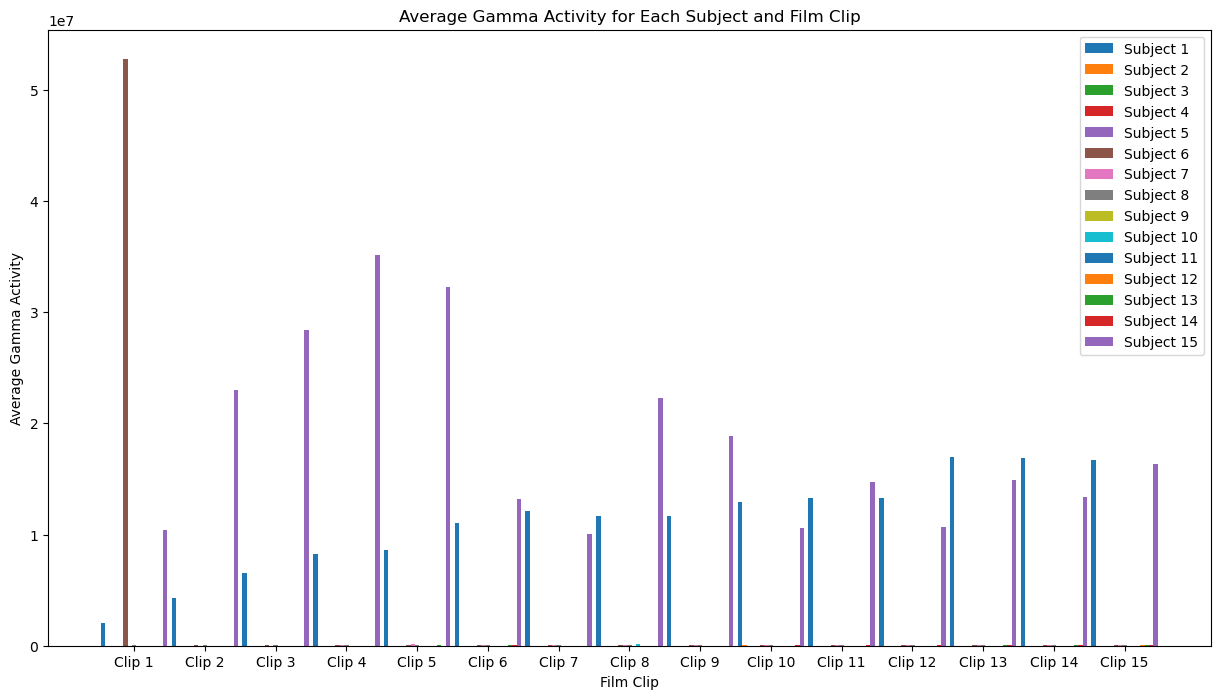

In [20]:
# Load the data
all_subjects_data = load_subject_data()

# Calculate the average gamma activity
gamma_activity = average_gamma_activity(all_subjects_data) # in terms of power and intensity

# Print the results in a table format
for subject_idx, subject_gamma in enumerate(gamma_activity):
    print(f"Subject {subject_idx + 1}: {subject_gamma}")
    
# Plot the average gamma activity
plot_gamma_activity(gamma_activity)


*Calculates the average activity in different frequency bands and gamma activity for each subject while watching movie clips*

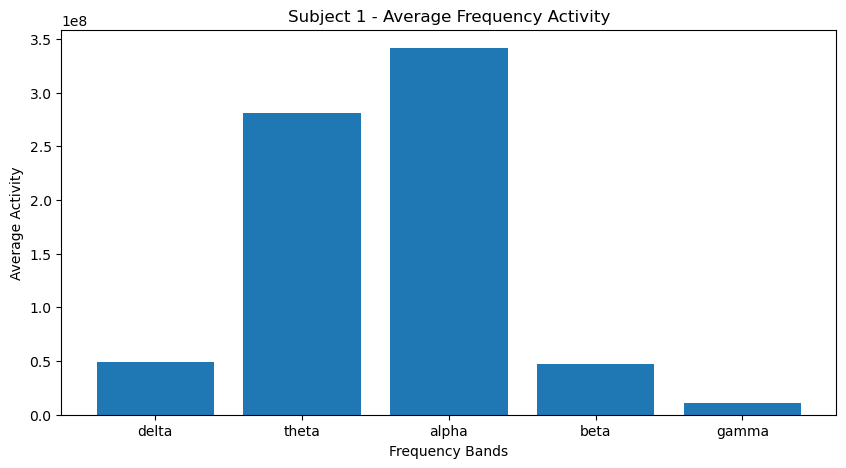

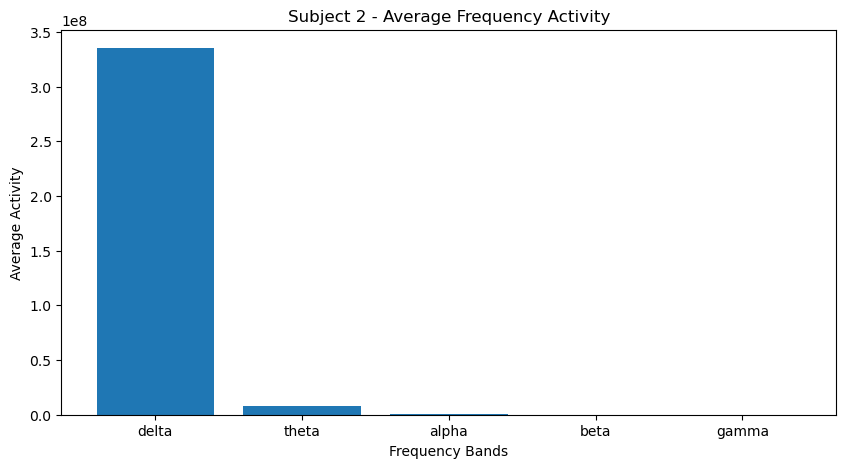

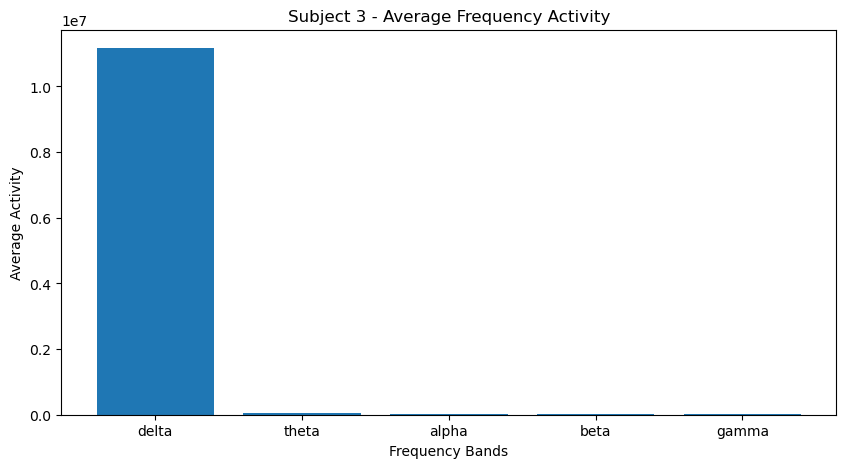

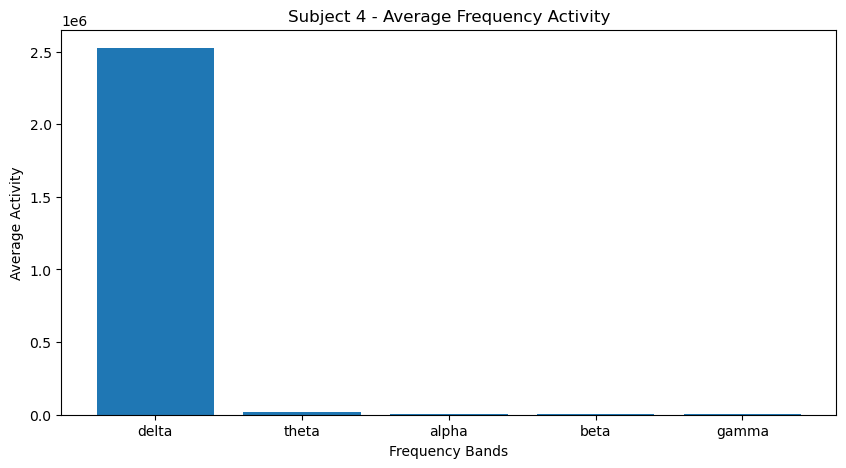

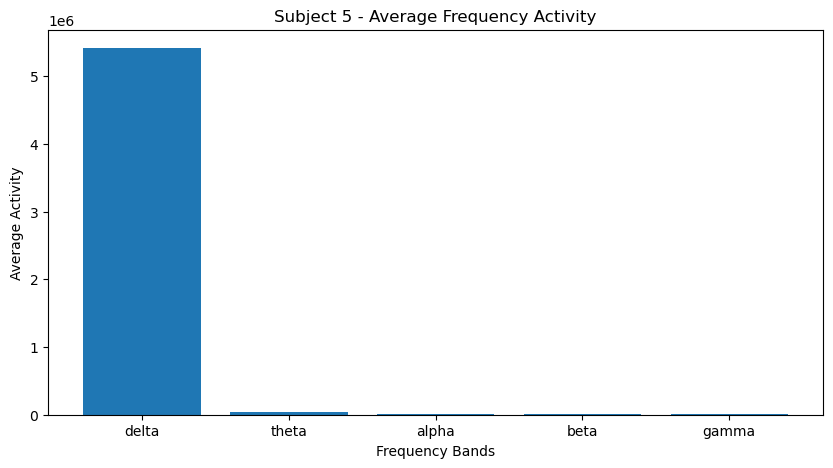

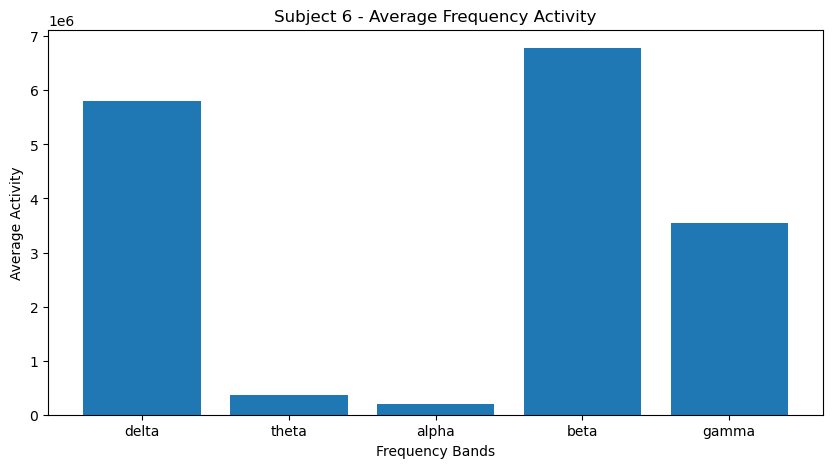

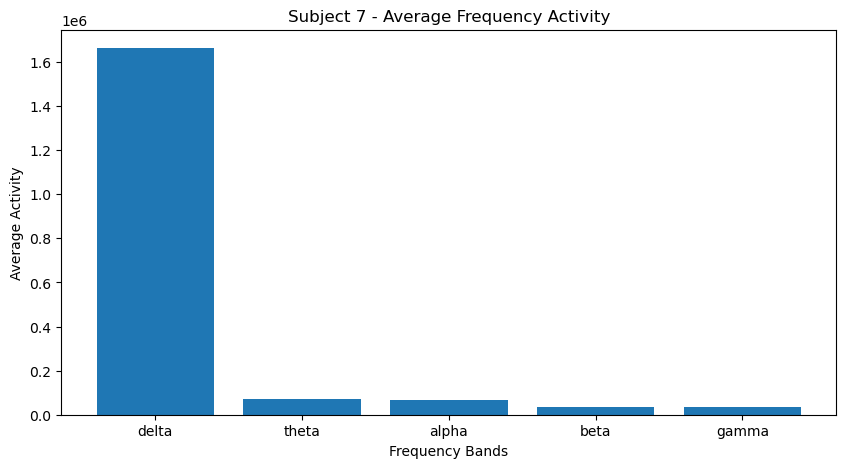

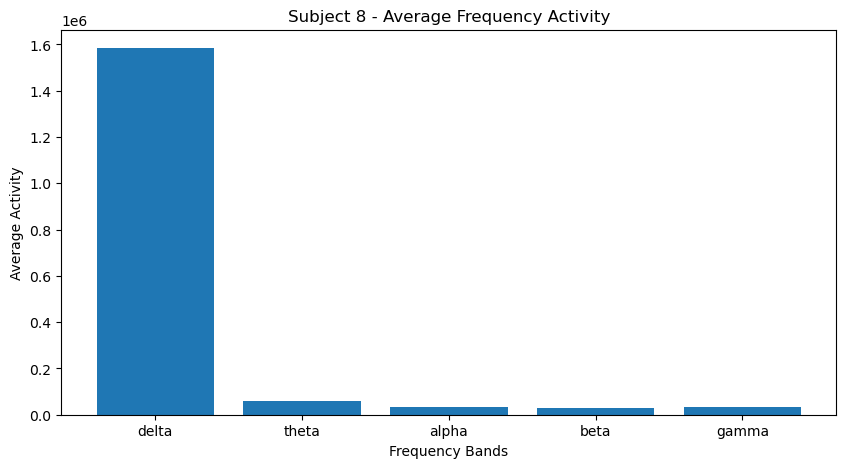

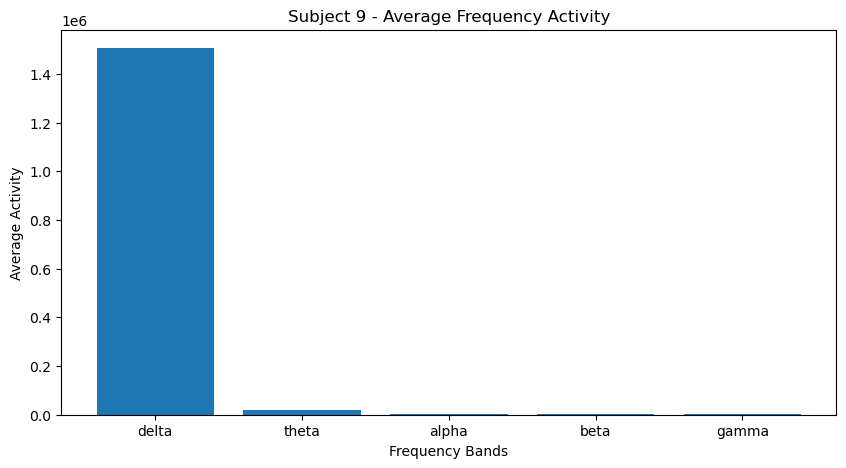

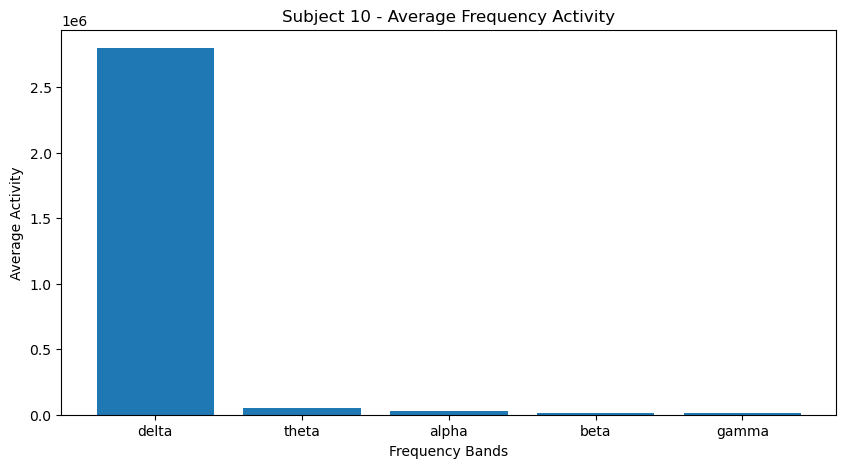

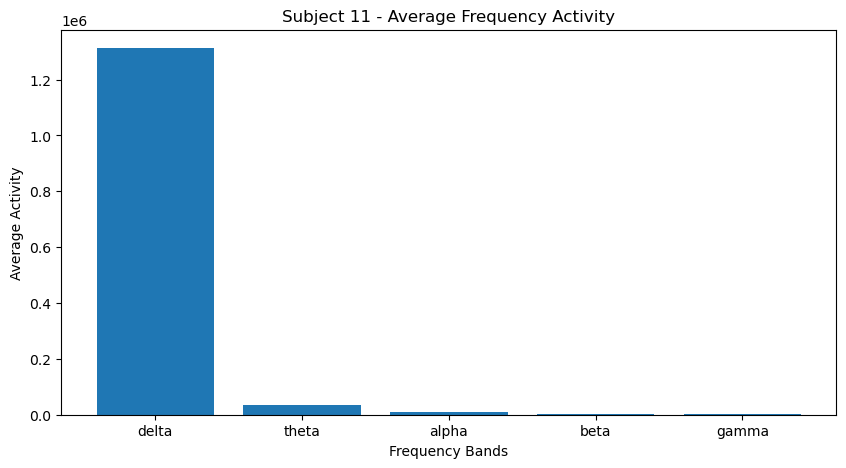

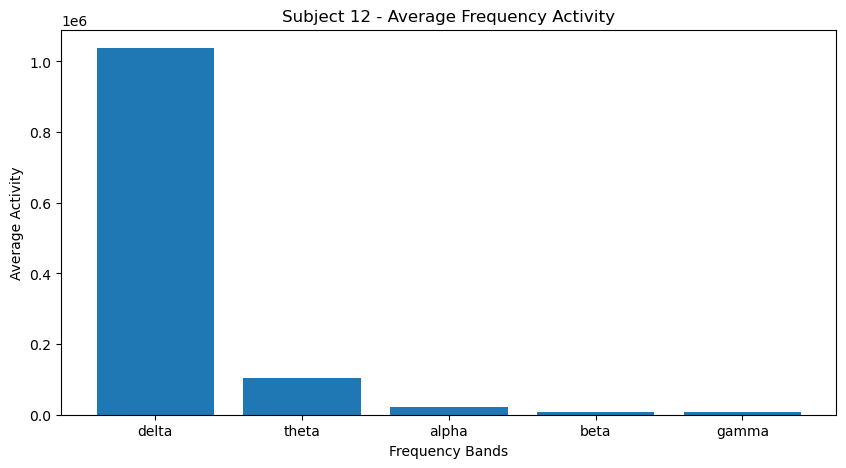

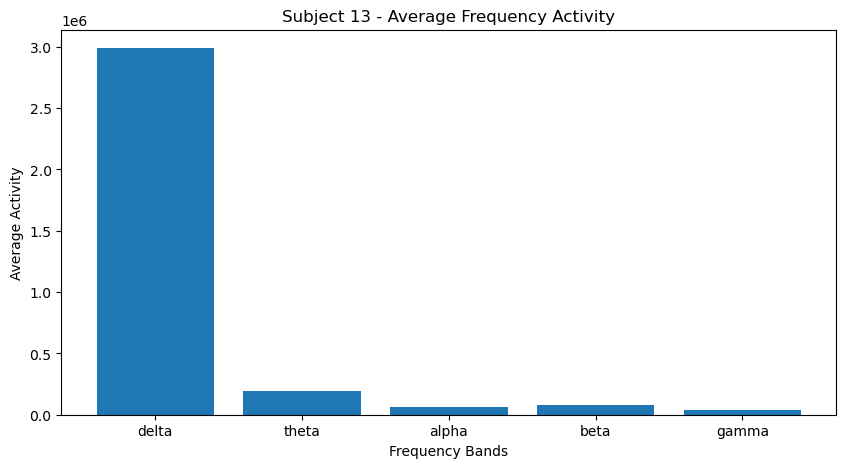

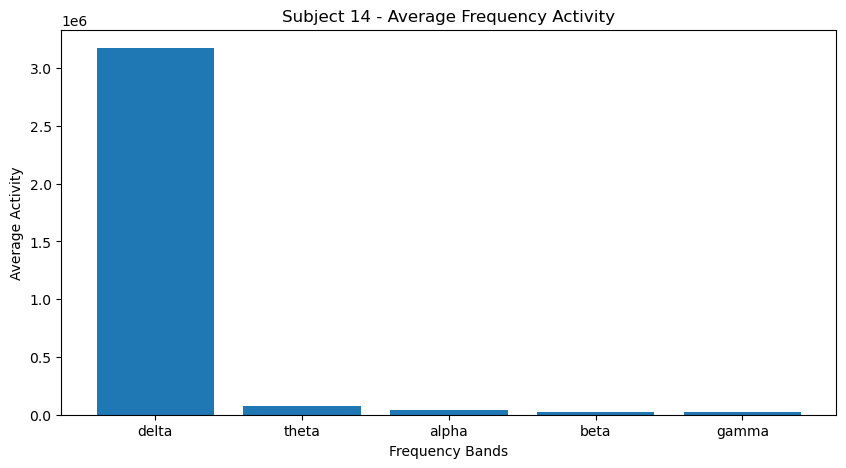

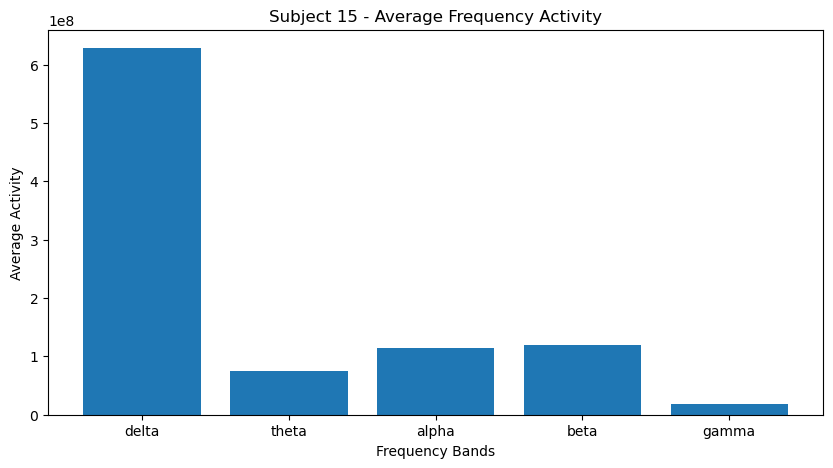

In [21]:
import matplotlib.pyplot as plt

# The plot_frequency_activity function creates a separate plot for each subject,
# displaying the average activity across the delta, theta, alpha, beta, and gamma frequency bands.

# Plot the frequency activity for each subject separately
def plot_frequency_activity(frequency_activity):
    frequency_names = ['delta', 'theta', 'alpha', 'beta', 'gamma']
    n_subjects = len(frequency_activity)
    
    for subject_idx, subject_activity in enumerate(frequency_activity):
        plt.figure(figsize=(10, 5))
        subject_freq_values = [np.mean(subject_activity[freq]) for freq in frequency_names]
        plt.bar(frequency_names, subject_freq_values)
        plt.xlabel('Frequency Bands')
        plt.ylabel('Average Activity')
        plt.title(f'Subject {subject_idx + 1} - Average Frequency Activity')
        plt.show()

# The plot_frequency_activity_general function calculates the mean activity across all subjects 
# for each frequency band, and displays the average activity across these frequency bands in a single plot.

# Plot the average frequency activity across all subjects
def plot_frequency_activity_general(frequency_activity):
    frequency_names = ['delta', 'theta', 'alpha', 'beta', 'gamma']
    n_subjects = len(frequency_activity)

    # Calculate the mean activity across subjects for each frequency band
    mean_activity = {freq: [] for freq in frequency_names}
    for subject_activity in frequency_activity:
        for freq_name in frequency_names:
            mean_activity[freq_name].append(np.mean(subject_activity[freq_name]))
    
    mean_activity = {freq: np.mean(values) for freq, values in mean_activity.items()}

    # Plot the average frequency activity across all subjects
    plt.figure(figsize=(10, 5))
    plt.bar(mean_activity.keys(), mean_activity.values())
    plt.xlabel('Frequency Bands')
    plt.ylabel('Average Activity')
    plt.title('Average Frequency Activity Across All Subjects')
    plt.show()

# The average_frequency_activity function calculates the average activity for each frequency band 
# for all subjects using the PSD (Power Spectral Density) values from the data."

# Calculate the average frequency activity for all subjects
def average_frequency_activity(all_subjects_data):
    frequency_activity = []

    for subject_data in all_subjects_data:
        subject_activity = {freq: [] for freq in ['delta', 'theta', 'alpha', 'beta', 'gamma']}
        for i in range(1, 16):
            for freq_idx, freq_name in enumerate(subject_activity.keys()):
                freq_values_movingAve = subject_data[f'psd_movingAve{i}'][:, :, freq_idx]
                freq_values_LDS = subject_data[f'psd_LDS{i}'][:, :, freq_idx]

                freq_values = np.concatenate([freq_values_movingAve, freq_values_LDS], axis=1)
                subject_activity[freq_name].append(np.mean(freq_values))
        frequency_activity.append(subject_activity)

    return frequency_activity


# Load the data
all_subjects_data = load_subject_data()

# Calculate the average frequency activity
frequency_activity = average_frequency_activity(all_subjects_data)

# # Print the results in a table format
# for subject_idx, subject_activity in enumerate(frequency_activity):
#     print(f"Subject {subject_idx + 1}:")
#     for freq_name, freq_values in subject_activity.items():
#         print(f"  {freq_name.capitalize()}: {freq_values}")

# Plot the average frequency activity
plot_frequency_activity(frequency_activity)


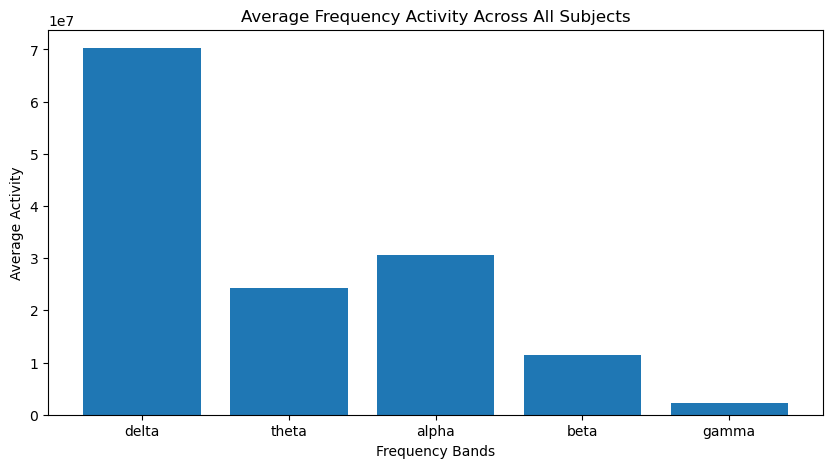

In [22]:
# Load the data
all_subjects_data = load_subject_data()

# Calculate the average frequency activity
frequency_activity = average_frequency_activity(all_subjects_data)

# Plot the average frequency activity
plot_frequency_activity_general(frequency_activity)


### **CORRELATION ANALYSIS*
*correlation analysis defined by the given subject and clip indices identified in the Louvain community. It extracts the Differential Entropy (DE) data, computes correlation matrices for each subject and clip in the community, and visualizes the matrices as heatmaps using Seaborn library. The resulting plot shows the correlation structure within and between the selected subjects and clips in the community.*

In [23]:
import numpy as np

# Extract the DE (Differential Entropy) data for a given community
def extract_data_for_community(subjects_data, subject_indices, clip_indices):
    community_data = []
    for subject_index in subject_indices:
        subject_clips = []
        for clip_index in clip_indices:
            de_key = f'de_movingAve{clip_index}'
            de_data = subjects_data[subject_index][de_key]
            subject_clips.append(de_data)
        community_data.append(subject_clips)
    return community_data

# Define the indices of the subjects and clips that belong to the community
subject_indices = [0, 2]  # Subjects 1 (male) and 3 (female)
clip_indices = [2, 5, 8, 11, 13, 14]  # Neutral clips and the happy clip

# Extract the DE data for the given community
community_data = extract_data_for_community(all_subjects_data, subject_indices, clip_indices)

# Compute the correlation matrices for each subject and clip
def compute_correlations(community_data):
    correlations = []
    for subject_data in community_data:
        subject_correlations = []
        for clip_data in subject_data:
            flattened_clip_data = clip_data.reshape(clip_data.shape[0], -1)  # Flatten the extra dimensions
            clip_correlations = np.corrcoef(flattened_clip_data)  # Compute the correlation matrix for the flattened clip data
            subject_correlations.append(clip_correlations)
        correlations.append(subject_correlations)
    return correlations

# Compute the correlation matrices for the community data
correlations = compute_correlations(community_data)


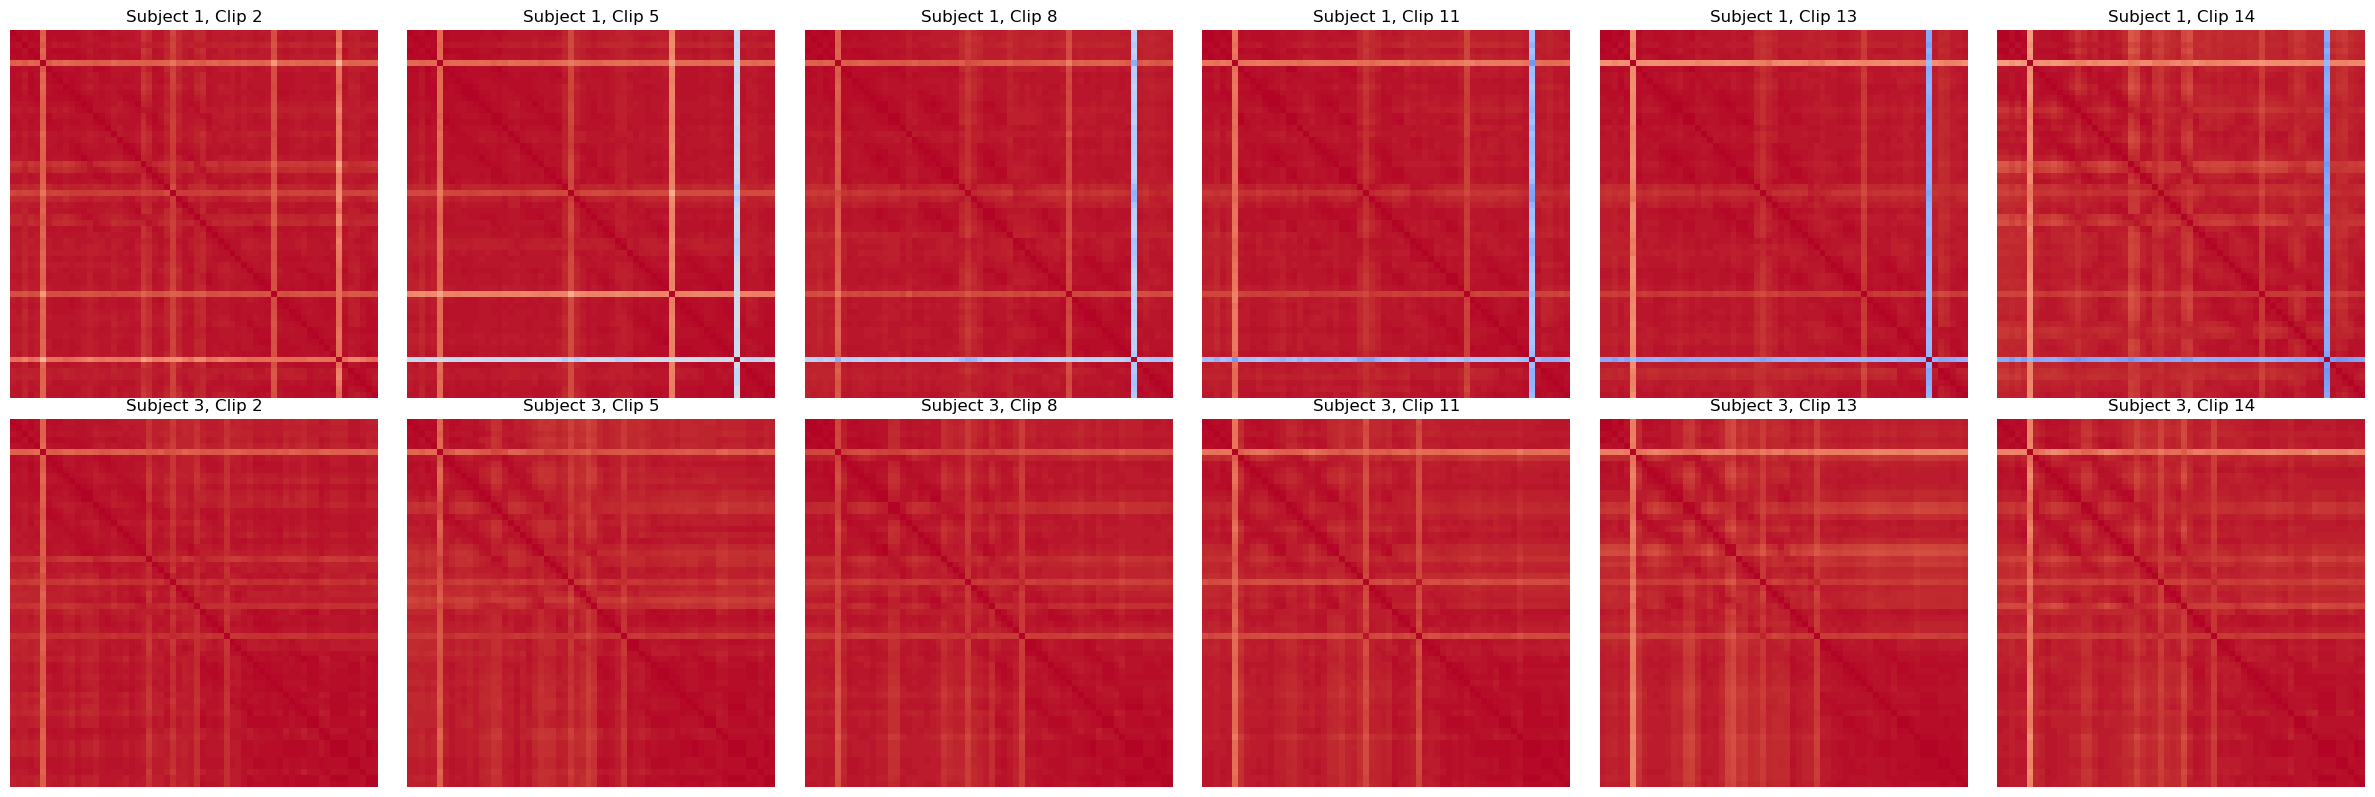

In [24]:
def visualize_correlations(correlations, subject_indices, clip_indices):
    n_subjects = len(subject_indices)
    n_clips = len(clip_indices)
    
    # Create a figure with subplots for each subject-clip combination
    fig, axes = plt.subplots(n_subjects, n_clips, figsize=(n_clips * 4, n_subjects * 4))
    
    # Loop through each subject and clip and plot the corresponding correlation matrix
    for i, subject_correlations in enumerate(correlations):
        for j, clip_correlations in enumerate(subject_correlations):
            ax = axes[i, j]  # Get the corresponding subplot axis
            # Plot the correlation matrix as a heatmap, with color scale from -1 to 1
            sns.heatmap(clip_correlations, cmap="coolwarm", vmin=-1, vmax=1, square=True, cbar=False, ax=ax)
            ax.set_title(f'Subject {subject_indices[i] + 1}, Clip {clip_indices[j]}')  # Set the subplot title
            ax.set_xticks([])  # Remove the x-axis ticks
            ax.set_yticks([])  # Remove the y-axis ticks
    
    plt.tight_layout()  # Adjust the subplots for better layout
    plt.show()

visualize_correlations(correlations, subject_indices, clip_indices)


*Analysing brain activity data related to emotions. The first function compute_correlations_alpha_theta() computes correlation matrices for alpha and theta frequency bands for a given community of subjects.*

In [25]:
import numpy as np
from scipy.stats import mannwhitneyu

# Compute correlation matrices for alpha and theta frequency bands for a given community
def compute_correlations_alpha_theta(community_data):
    correlations_alpha = []  # list to store correlation matrices for alpha band
    correlations_theta = []  # list to store correlation matrices for theta band

    for subject_data in community_data:  # loop through each subject in the community
        subject_correlations_alpha = []  # list to store correlation matrices for alpha band for current subject
        subject_correlations_theta = []  # list to store correlation matrices for theta band for current subject
        for clip_data in subject_data:  # loop through each clip for current subject
            alpha_data = clip_data[:, 1, :]  # Extract alpha band (index 1)
            theta_data = clip_data[:, 0, :]  # Extract theta band (index 0)
            
            clip_correlations_alpha = np.corrcoef(alpha_data)  # compute correlation matrix for alpha data
            clip_correlations_theta = np.corrcoef(theta_data)  # compute correlation matrix for theta data
            
            subject_correlations_alpha.append(clip_correlations_alpha)  # add alpha correlation matrix to list for current subject
            subject_correlations_theta.append(clip_correlations_theta)  # add theta correlation matrix to list for current subject
        
        correlations_alpha.append(subject_correlations_alpha)  # add alpha correlation matrices for current subject to community list
        correlations_theta.append(subject_correlations_theta)  # add theta correlation matrices for current subject to community list

    return correlations_alpha, correlations_theta

# Compute the correlation matrices for alpha and theta frequency bands
correlations_alpha, correlations_theta = compute_correlations_alpha_theta(community_data)


*Extract and compare mean feature values for a particular emotion data between two subjects*

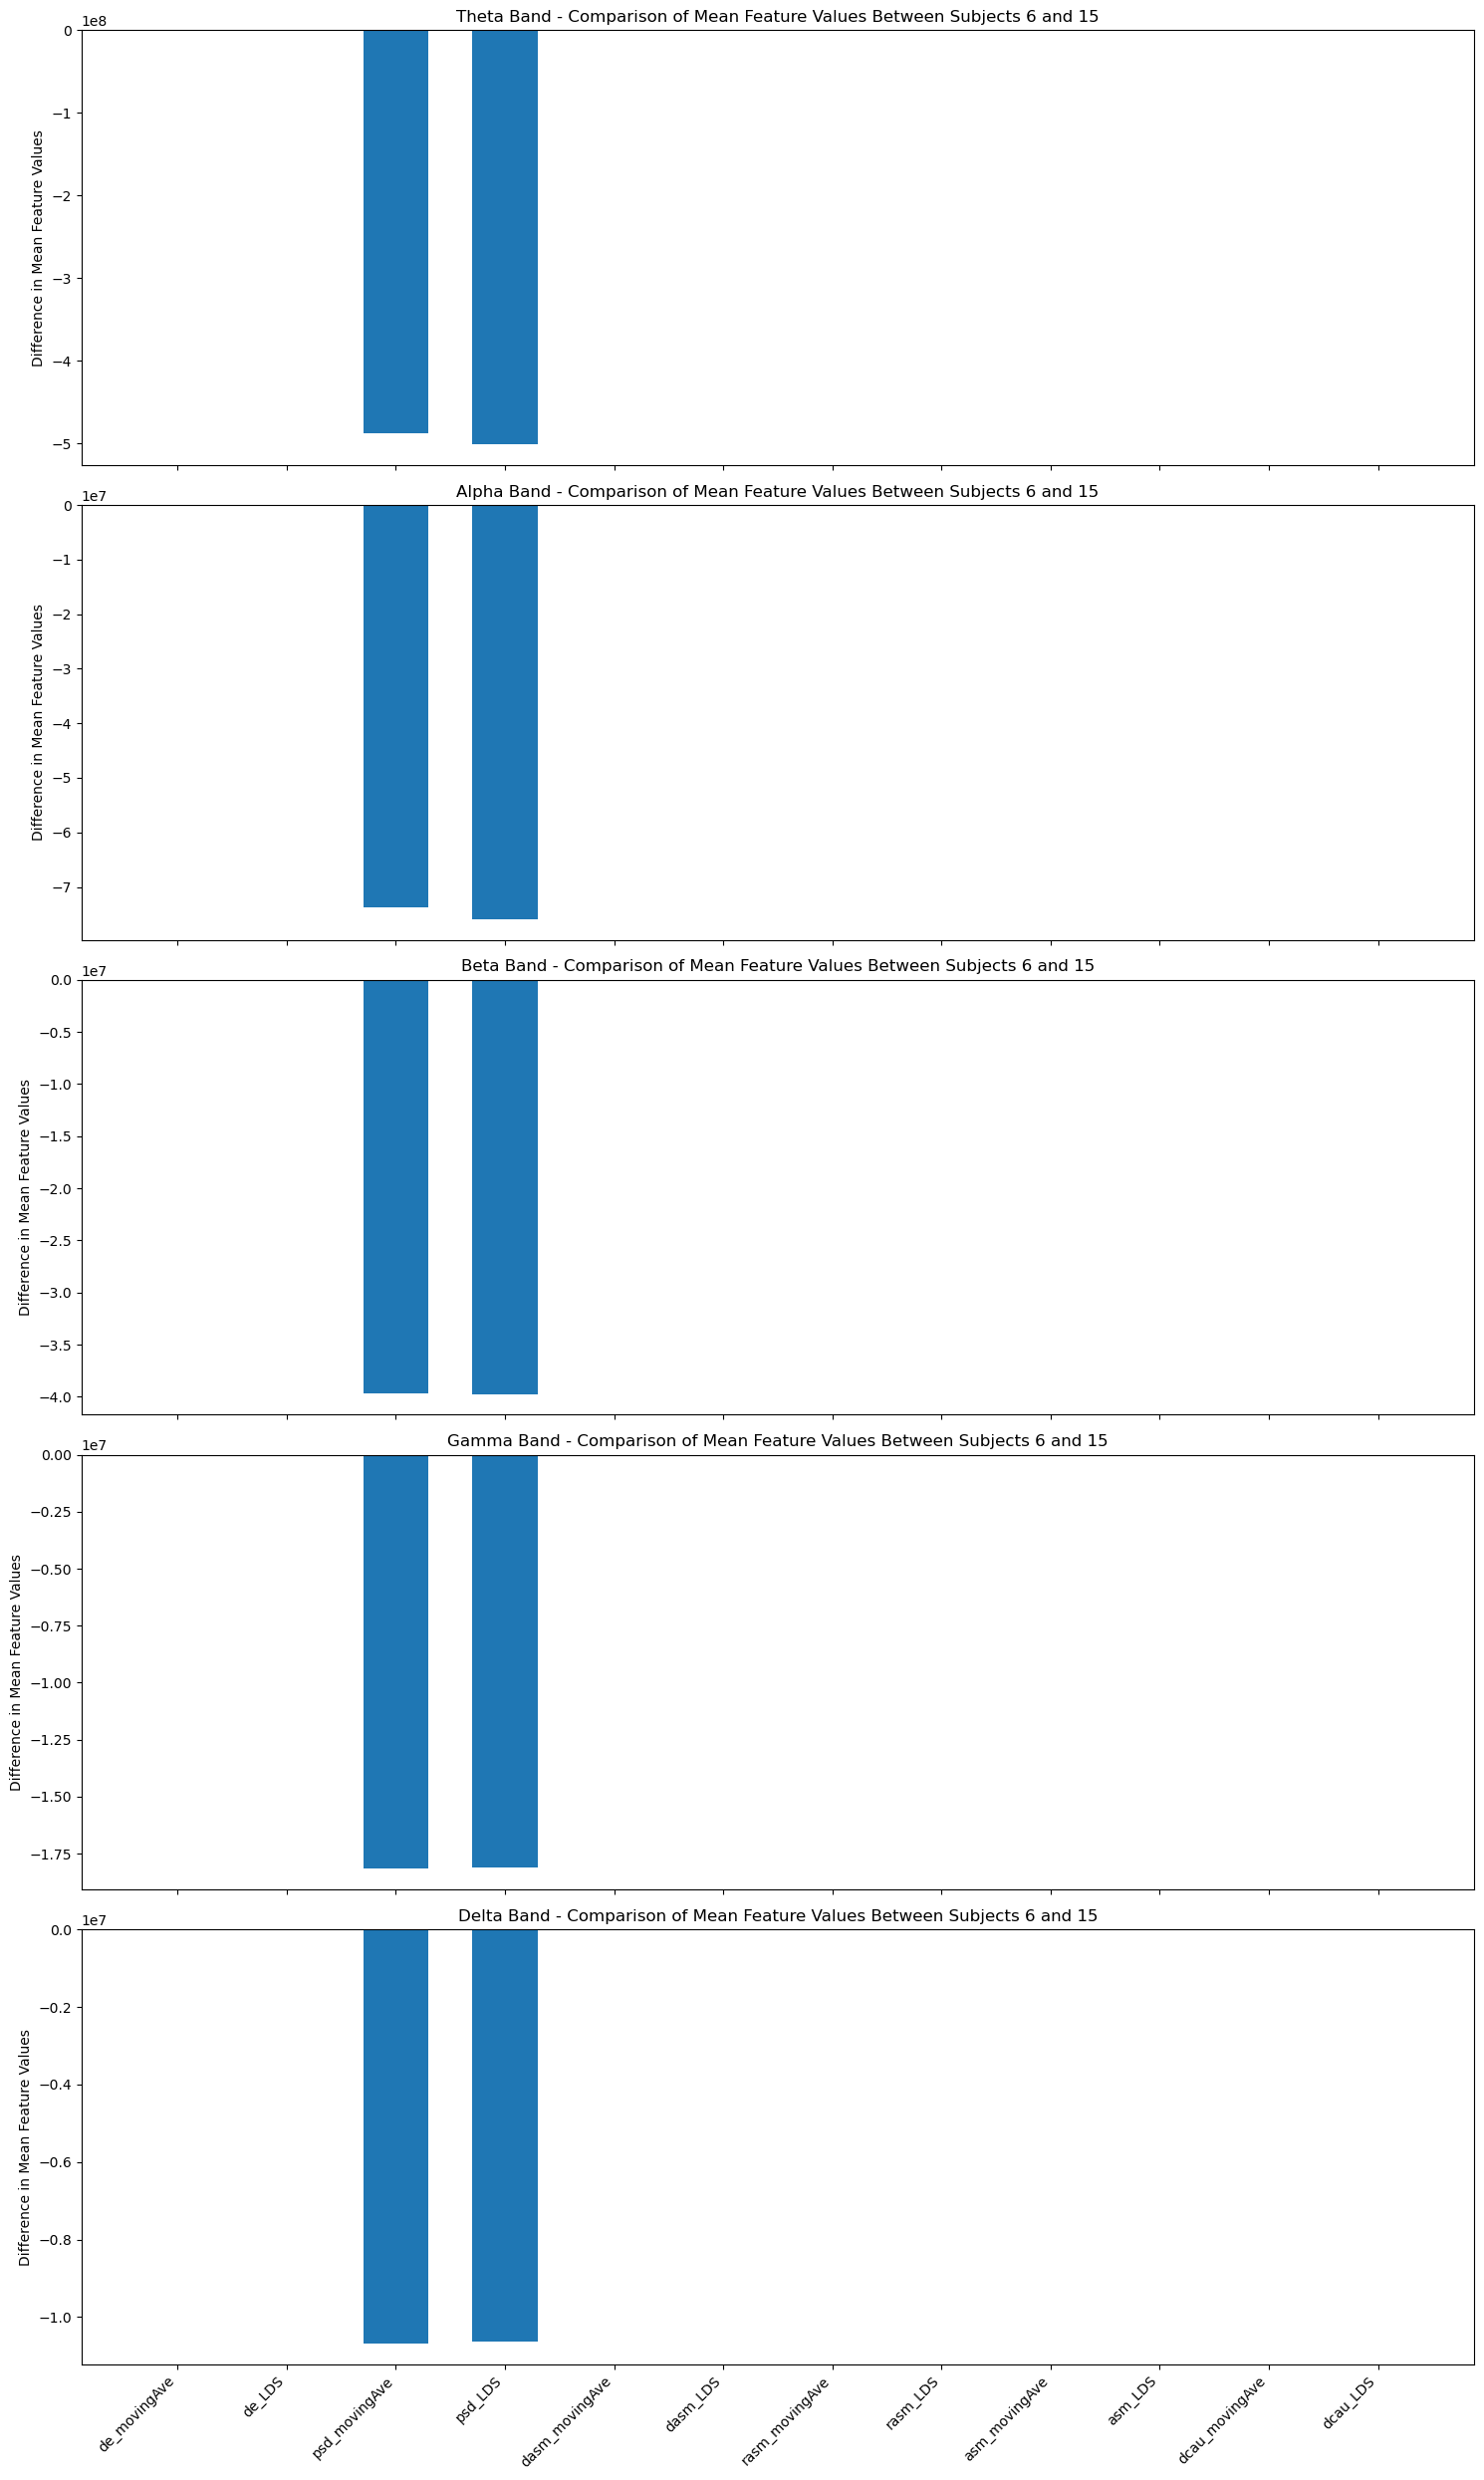

In [26]:
# Function to extract emotion data for a given subject and film clip index
def extract_emotion_data(subjects_data, labels, subject_idx, emotion_idx):
    subject_data = subjects_data[subject_idx]
    emotion_data = {}
    
    # Iterate through the keys in the subject data and find the ones corresponding to the given emotion index
    for key in subject_data.keys():
        if key.endswith(str(emotion_idx)):
            emotion_data[key] = subject_data[key]
    
    return emotion_data

emotion_idx = 12  # Film clip number 12 (sad emotion)

# Extract the emotion data for two subjects
subject_6_sad_data = extract_emotion_data(all_subjects_data, labels, 5, emotion_idx)  # Subject 6 (0-based indexing)
subject_15_sad_data = extract_emotion_data(all_subjects_data, labels, 14, emotion_idx)  # Subject 15 (0-based indexing)


# Function to calculate the mean feature values for a given emotion data
def calculate_mean_feature_values(emotion_data):
    mean_values = {}
    
    # Iterate through the keys in the emotion data and calculate the mean feature value for each
    for key in emotion_data:
        feature_data = emotion_data[key]
        mean_feature_value = np.mean(feature_data, axis=(0, 1))
        mean_values[key] = mean_feature_value
    
    return mean_values

# Calculate the mean feature values for the two subjects
subject_6_mean_values = calculate_mean_feature_values(subject_6_sad_data)
subject_15_mean_values = calculate_mean_feature_values(subject_15_sad_data)


# Function to compare the mean feature values between two subjects
def compare_mean_feature_values(mean_values_1, mean_values_2):
    comparison_results = {}
    
    # Iterate through the keys in the first mean values dictionary and calculate the difference between the two mean values
    for key in mean_values_1:
        difference = mean_values_1[key] - mean_values_2[key]
        comparison_results[key] = difference
    
    return comparison_results

# Compare the mean feature values between the two subjects
comparison_results = compare_mean_feature_values(subject_6_mean_values, subject_15_mean_values)


# Function to plot the comparison of mean feature values between two subjects
def plot_mean_feature_values_comparison(comparison_results, subject_1_idx, subject_2_idx):
    labels = [key[:-2] for key in comparison_results.keys()]  # Extract the feature names from the dictionary keys
    differences = [comparison_results[key] for key in comparison_results.keys()]  # Extract the feature value differences from the dictionary values

    fig, axs = plt.subplots(5, figsize=(15, 25), sharex=True)  # Create a figure with subplots for each frequency band
    
    # Iterate through each frequency band and plot the corresponding differences in mean feature values
    for band_idx, band_name in enumerate(['Theta', 'Alpha', 'Beta', 'Gamma', 'Delta']):
        ax = axs[band_idx]
        band_differences = [d[band_idx] for d in differences]  # Extract the differences in mean feature values for the current frequency band
        
        x = np.arange(len(labels))
        width = 0.6

        rects = ax.bar(x, band_differences, width, label='Difference in Mean Feature Values')  # Plot the bar chart for the differences in mean feature values

        ax.set_ylabel('Difference in Mean Feature Values')
        ax.set_title(f'{band_name} Band - Comparison of Mean Feature Values Between Subjects {subject_1_idx} and {subject_2_idx}')
        ax.set_xticks(x)
        ax.set_xticklabels(labels, rotation=45, ha='right')

    fig.tight_layout()
    plt.show()

plot_mean_feature_values_comparison(comparison_results, 6, 15)